# **INTRODUCTION**

**DataSet:** Explore the preferences, interests, habits, opinions, and fears of young people

**Dataset Source:** Kaggle [Young People Survey](https://www.kaggle.com/miroslavsabo/young-people-survey/data)

## **Objective:**

Below are the following questions are needed to be answered:

1. Given the different cluster of behaviors, does this predict the various kinds of phobias among the young people.

2. Do women fear certain phenomena significantly more than men? 

In [0]:
# Autosave every 1 second
%autosave 1

Autosaving every 1 seconds


In [0]:
# Import Libraries
#import pandas for data manipulation and eda
import pandas as pd

#importing matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from wordcloud import WordCloud

In [0]:
# Load dataset
data = pd.read_csv("responses.csv")
data

Music  Slow songs or fast songs  ...  Village - town  House - block of flats
0       5.0                       3.0  ...         village          block of flats
1       4.0                       4.0  ...            city          block of flats
2       5.0                       5.0  ...            city          block of flats
3       5.0                       3.0  ...            city          house/bungalow
4       5.0                       3.0  ...         village          house/bungalow
...     ...                       ...  ...             ...                     ...
1005    5.0                       2.0  ...            city          house/bungalow
1006    4.0                       4.0  ...         village          house/bungalow
1007    4.0                       3.0  ...            city          block of flats
1008    5.0                       3.0  ...            city          block of flats
1009    5.0                       5.0  ...         village          house/bungalow

[1010 rows x 150 columns]

In [0]:
data.shape

(1010, 150)

There are 1010 rows and 150 variables in the dataset

In [0]:
#Get summary of the data
data.describe()

Music  Slow songs or fast songs  ...      Weight  Number of siblings
count  1007.000000               1008.000000  ...  990.000000         1004.000000
mean      4.731877                  3.328373  ...   66.405051            1.297809
std       0.664049                  0.833931  ...   13.839561            1.013348
min       1.000000                  1.000000  ...   41.000000            0.000000
25%       5.000000                  3.000000  ...   55.000000            1.000000
50%       5.000000                  3.000000  ...   64.000000            1.000000
75%       5.000000                  4.000000  ...   75.000000            2.000000
max       5.000000                  5.000000  ...  165.000000           10.000000

[8 rows x 139 columns]

In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB


In [0]:
data.nunique()

Music                       5
Slow songs or fast songs    5
Dance                       5
Folk                        5
Country                     5
                           ..
Left - right handed         2
Education                   6
Only child                  2
Village - town              2
House - block of flats      2
Length: 150, dtype: int64

In [0]:
# Using Pandas Profiling to get a detailed summary report of our dataset
import pandas_profiling as pp
pp.ProfileReport(data)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


## **Data Cleaning**

In [0]:
# Check for missing data
data.isnull().sum()

Music                       3
Slow songs or fast songs    2
Dance                       4
Folk                        5
Country                     5
                           ..
Left - right handed         3
Education                   1
Only child                  2
Village - town              4
House - block of flats      4
Length: 150, dtype: int64

In [0]:
%matplotlib inline

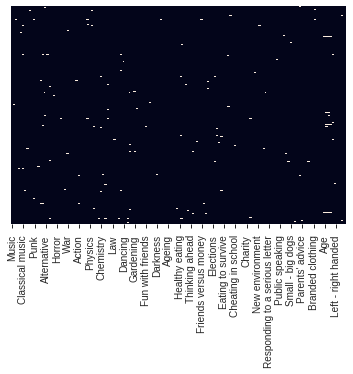

In [0]:
# Visualize the missing data
# Using a heatmap
sns.heatmap(data.isnull(),yticklabels = False, cbar=False)

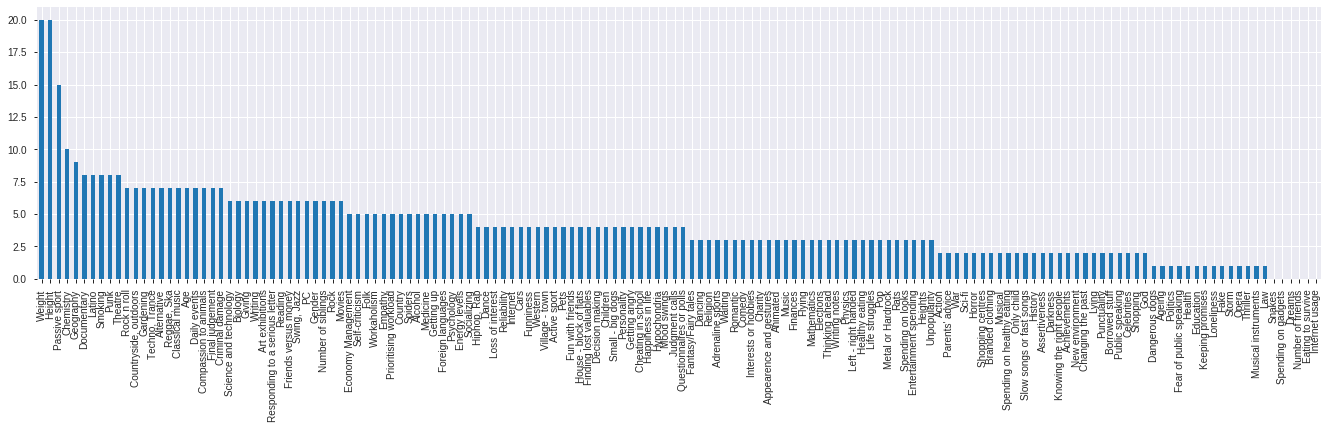

In [0]:
# Using a bar
nulls = data.isnull().sum().sort_values(ascending=False)
nulls.plot(
    kind='bar', figsize=(23, 5))

Height and weight have the most missing values but our analysis of the hypothesis testing of phobias does not get affected by the two columns

In [0]:
# Find out the columns in the dataset
data.columns

Index(['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock',
       ...
       'Age', 'Height', 'Weight', 'Number of siblings', 'Gender',
       'Left - right handed', 'Education', 'Only child', 'Village - town',
       'House - block of flats'],
      dtype='object', length=150)

In [0]:
data.head(2)

Music  Slow songs or fast songs  ...  Village - town  House - block of flats
0    5.0                       3.0  ...         village          block of flats
1    4.0                       4.0  ...            city          block of flats

[2 rows x 150 columns]

In [0]:
# Rename the column names to be standard
# Editing the column names
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns

Index(['music', 'slow_songs_or_fast_songs', 'dance', 'folk', 'country',
       'classical_music', 'musical', 'pop', 'rock', 'metal_or_hardrock',
       ...
       'age', 'height', 'weight', 'number_of_siblings', 'gender',
       'left_-_right_handed', 'education', 'only_child', 'village_-_town',
       'house_-_block_of_flats'],
      dtype='object', length=150)

In [0]:
# Dropping columns we do not need for this analysis
# We are only dealing with Gender, phobias and a few other columns that are required for this analysis. 

data.drop(['slow_songs_or_fast_songs', 'dance', 'folk', 'country',
              'classical_music', 'musical', 'pop', 'rock', 'metal_or_hardrock', 'punk','hiphop,_rap', 'reggae,_ska', 'swing,_jazz',
           'swing,_jazz', 'rock_n_roll', 'alternative','latino','techno,_trance', 'opera', 'movies', 'horror', 'thriller', 'comedy',
           'romantic', 'sci-fi', 'war',	'fantasy/fairy_tales',	'animated',	'documentary',	'western',	'action',	'history',	'psychology',	
           'politics', 'mathematics',	'physics',	'internet',	'pc',	'economy_management',	'biology', 'village_-_town',
       'house_-_block_of_flats', 'height', 'weight'], axis = 1, inplace = True)

# confirming that we only have the relevant columns
data.head()

music  chemistry  ...                education  only_child
0    5.0        3.0  ...  college/bachelor degree          no
1    4.0        1.0  ...  college/bachelor degree          no
2    5.0        1.0  ...         secondary school          no
3    5.0        3.0  ...  college/bachelor degree         yes
4    5.0        3.0  ...         secondary school          no

[5 rows x 107 columns]

In [0]:
data.columns

Index(['music', 'chemistry', 'reading', 'geography', 'foreign_languages',
       'medicine', 'law', 'cars', 'art_exhibitions', 'religion',
       ...
       'entertainment_spending', 'spending_on_looks', 'spending_on_gadgets',
       'spending_on_healthy_eating', 'age', 'number_of_siblings', 'gender',
       'left_-_right_handed', 'education', 'only_child'],
      dtype='object', length=107)

In [0]:
data.drop(['chemistry', 'reading', 'geography', 'foreign_languages',
       'medicine', 'law', 'cars', 'art_exhibitions', 'religion', 'entertainment_spending', 'spending_on_looks', 'spending_on_gadgets',
       'spending_on_healthy_eating', 'age', 'number_of_siblings'], axis = 1, inplace = True)
data.columns

Index(['music', 'countryside,_outdoors', 'dancing', 'musical_instruments',
       'writing', 'passive_sport', 'active_sport', 'gardening', 'celebrities',
       'shopping', 'science_and_technology', 'theatre', 'fun_with_friends',
       'adrenaline_sports', 'pets', 'flying', 'storm', 'darkness', 'heights',
       'spiders', 'snakes', 'rats', 'ageing', 'dangerous_dogs',
       'fear_of_public_speaking', 'smoking', 'alcohol', 'healthy_eating',
       'daily_events', 'prioritising_workload', 'writing_notes', 'workaholism',
       'thinking_ahead', 'final_judgement', 'reliability', 'keeping_promises',
       'loss_of_interest', 'friends_versus_money', 'funniness', 'fake',
       'criminal_damage', 'decision_making', 'elections', 'self-criticism',
       'judgment_calls', 'hypochondria', 'empathy', 'eating_to_survive',
       'giving', 'compassion_to_animals', 'borrowed_stuff', 'loneliness',
       'cheating_in_school', 'health', 'changing_the_past', 'god', 'dreams',
       'charity', 'numb

In [0]:
data.drop(['healthy_eating',
       'daily_events', 'prioritising_workload', 'writing_notes', 'workaholism',
       'thinking_ahead', 'final_judgement', 'reliability', 'keeping_promises',
       'loss_of_interest', 'friends_versus_money', 'funniness', 'fake',
       'criminal_damage', 'decision_making', 'elections', 'self-criticism',
       'judgment_calls', 'hypochondria', 'empathy', 'eating_to_survive',
       'giving', 'compassion_to_animals', 'borrowed_stuff', 'loneliness',
       'cheating_in_school', 'health', 'changing_the_past', 'god', 'dreams',
       'charity', 'number_of_friends', 'punctuality', 'lying', 'waiting',
       'new_environment', 'mood_swings', 'appearence_and_gestures',
       'socializing', 'achievements', 'responding_to_a_serious_letter',
       'children', 'assertiveness', 'getting_angry',
       'knowing_the_right_people', 'public_speaking', 'unpopularity',
       'life_struggles', 'happiness_in_life', 'energy_levels',
       'small_-_big_dogs', 'personality', 'finding_lost_valuables',
       'getting_up', 'interests_or_hobbies',
       'questionnaires_or_polls', 'finances',
       'shopping_centres', 'countryside,_outdoors', 'dancing', 'musical_instruments',
       'writing', 'passive_sport', 'active_sport', 'gardening', 'celebrities',
       'shopping', 'science_and_technology', 'theatre', 'fun_with_friends', 'education',
       'adrenaline_sports'], axis = 1, inplace = True)
# confirming that we only have the relevant columns
data.head()

music  pets  flying  ...  gender  left_-_right_handed  only_child
0    5.0   4.0     1.0  ...  female         right handed          no
1    4.0   5.0     1.0  ...  female         right handed          no
2    5.0   5.0     1.0  ...  female         right handed          no
3    5.0   1.0     2.0  ...  female         right handed         yes
4    5.0   1.0     1.0  ...  female         right handed          no

[5 rows x 20 columns]

In [0]:
# saving the dataframe 
data.to_csv('leandata.csv')

In [0]:
data = pd.read_csv('leandata.csv')
data.head()

Unnamed: 0  music  pets  ...  gender  left_-_right_handed  only_child
0           0    5.0   4.0  ...  female         right handed          no
1           1    4.0   5.0  ...  female         right handed          no
2           2    5.0   5.0  ...  female         right handed          no
3           3    5.0   1.0  ...  female         right handed         yes
4           4    5.0   1.0  ...  female         right handed          no

[5 rows x 21 columns]

In [0]:
# Check missing values of the cleaned dataset
data.isnull().sum()

Unnamed: 0                 0
music                      3
pets                       4
flying                     3
storm                      1
darkness                   2
heights                    3
spiders                    5
snakes                     0
rats                       3
ageing                     1
dangerous_dogs             1
fear_of_public_speaking    1
smoking                    8
alcohol                    5
parents'_advice            2
internet_usage             0
branded_clothing           2
gender                     6
left_-_right_handed        3
only_child                 2
dtype: int64

In [0]:
# Drop unnamed column
data.drop(['Unnamed: 0', ], axis = 1, inplace = True)
# confirming that we only have the relevant columns
data.head()

music  pets  flying  ...  gender  left_-_right_handed  only_child
0    5.0   4.0     1.0  ...  female         right handed          no
1    4.0   5.0     1.0  ...  female         right handed          no
2    5.0   5.0     1.0  ...  female         right handed          no
3    5.0   1.0     2.0  ...  female         right handed         yes
4    5.0   1.0     1.0  ...  female         right handed          no

[5 rows x 20 columns]

In [0]:
data.shape

(1010, 20)

The cleaned dataset now has 1010 rows and 20 columns which is what we will be focusing on in our analysis

In [0]:
data = data.rename({"parents'_advice":"parent_advice"},axis=1)
data.head()

music  pets  flying  ...  gender  left_-_right_handed  only_child
0    5.0   4.0     1.0  ...  female         right handed          no
1    4.0   5.0     1.0  ...  female         right handed          no
2    5.0   5.0     1.0  ...  female         right handed          no
3    5.0   1.0     2.0  ...  female         right handed         yes
4    5.0   1.0     1.0  ...  female         right handed          no

[5 rows x 20 columns]

In [0]:
# Check for duplicated entries
data_duplicate = data[data.duplicated()]
data_duplicate.shape

(1, 20)

There are one duplicated rows

In [0]:
# Check which row was duplicated
duplicateRowsDF = data[data.duplicated()]
print(duplicateRowsDF)

     music  pets  flying  ...  gender  left_-_right_handed  only_child
848    5.0   2.0     1.0  ...    male         right handed          no

[1 rows x 20 columns]


In [0]:
# Drop duplicated rows
data= data.drop_duplicates()
# Check for duplicated entries
data_duplicate = data[data.duplicated()]
data_duplicate.shape

(0, 20)

The duplicated row has been dropped

**Exploring categorical data using WordCloud**

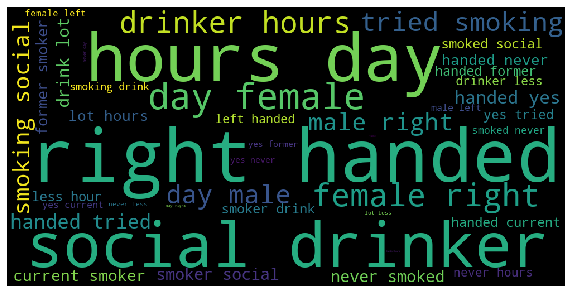

In [0]:
# Exploring categorical data using WordCloud

text = open('leandata.csv').read()
wordcloud = WordCloud(width = 1000, height = 500).generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Just by looking at the above image we can conclude that Right Handed, Social Drinker and Females are more in number

#UNIVARIATE ANALYSIS

## Categorical data

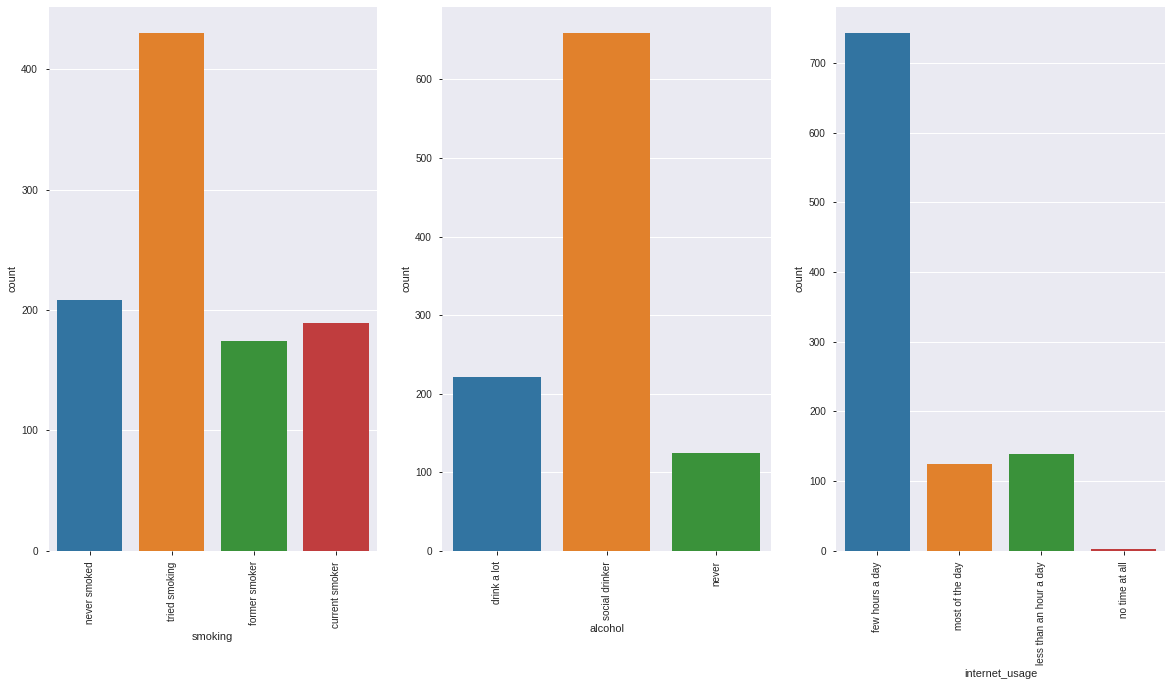

In [0]:
categorical =  ['smoking','alcohol','internet_usage','gender','left_-_right_handed']
fig, ax = plt.subplots(1, 3, figsize=(20, 10))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Most of the people have tried smoking at one point while the least most of people is of those who are former smokers

Social drikers are the most according to our dataset. tHE LEAS

## Numerical data

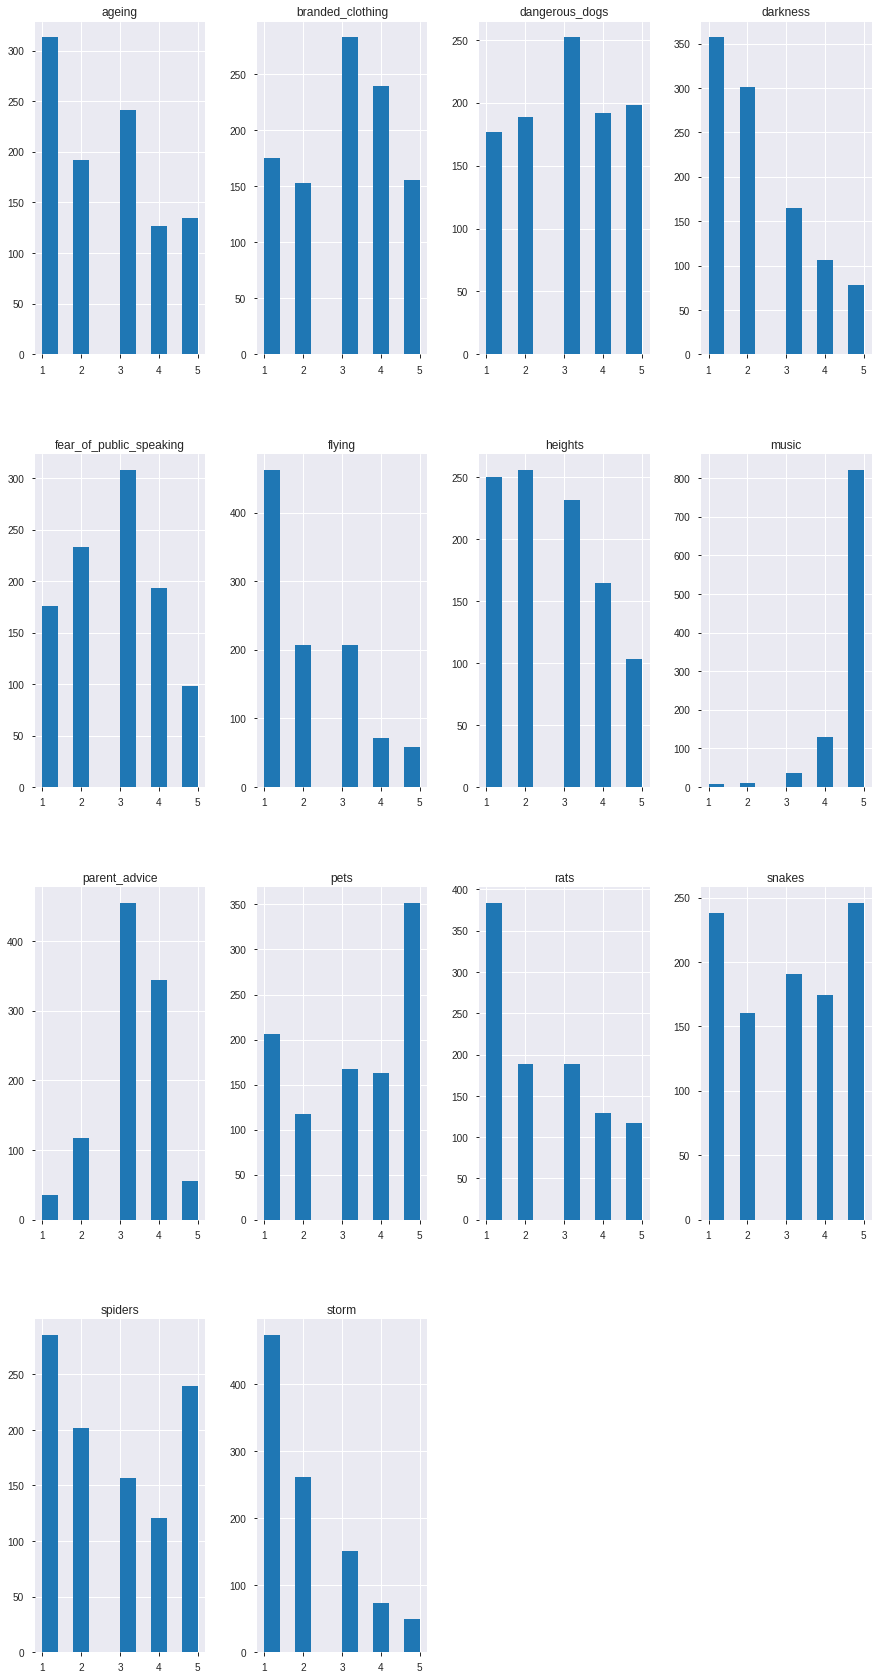

In [0]:
from matplotlib import pyplot
names = ['smoking','alcohol','internet_usage','gender','left_-_right_handed']
data.hist(figsize=(15,30))
pyplot.show()

# BIVARIATE ANALYSIS

## Numerical & Numerical	


This is a test of relationship between variables

<function matplotlib.pyplot.show>

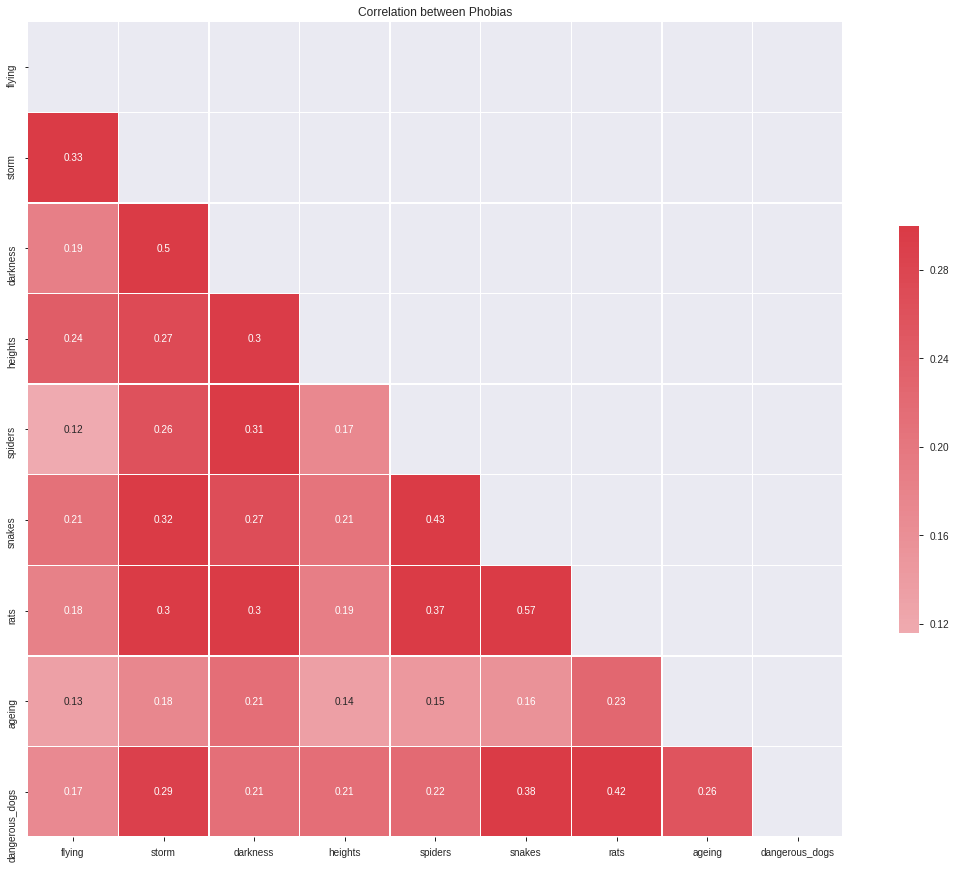

In [0]:
data1 = data.iloc[:,2:11]

correlations = data1.corr() 
mask = np.zeros_like(correlations, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 
f, ax = plt.subplots(figsize=(20, 15)) 
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
_ = sns.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0, 
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.title('Correlation between Phobias')
plt.show



Values close to 1 shows for a strong correlation and from the table above, most variables are correlated as they have values close to one

In [0]:
## Extracting specific values in columns

sample_data = data[(data['smoking'] == 'former smoker') & (data['fear_of_public_speaking'] == 5.0)]

sample_data.head()


music  pets  flying  ...  gender  left_-_right_handed  only_child
3      5.0   1.0     2.0  ...  female         right handed         yes
73     5.0   5.0     5.0  ...    male         right handed         yes
88     5.0   5.0     5.0  ...  female         right handed         yes
96     5.0   1.0     1.0  ...    male         right handed          no
114    5.0   5.0     1.0  ...  female         right handed          no

[5 rows x 20 columns]

In [0]:
sample_data.shape

(19, 20)

By default, the whole population is has been reduced to a 99 rows dataset from 1010. This is a form of cluster sampling because we grouped our dataset into slusters and took an entire cluster of day_type which was the weekend

In [0]:
## Extracting specific values in columns

sample_data2 = data[(data['gender'] == 'female') & (data['fear_of_public_speaking'] >= 5.0)]

sample_data2.head()

music  pets  flying  ...  gender  left_-_right_handed  only_child
3     5.0   1.0     2.0  ...  female         right handed         yes
11    5.0   1.0     4.0  ...  female         right handed          no
24    5.0   3.0     1.0  ...  female         right handed          no
36    5.0   5.0     3.0  ...  female         right handed          no
42    5.0   5.0     1.0  ...  female         right handed         yes

[5 rows x 20 columns]

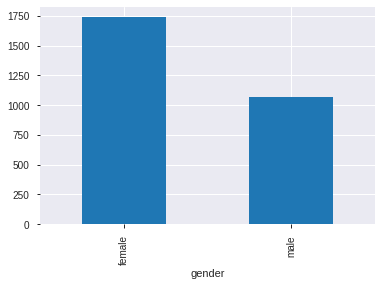

In [0]:

## Detemining who has a higher fear of public speaking between females and males  
from matplotlib import pyplot

sum_gender = data.groupby(['gender'])['fear_of_public_speaking'].sum()

sum_gender.plot.bar()


From the above we see that more females than males have a fear of public speaking

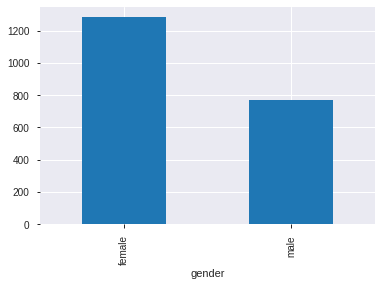

In [0]:

## Detemining who has a higher fear of flying between females and males  

sum_gender = data.groupby(['gender'])['flying'].sum()

sum_gender.plot.bar()

From the above we see that more females than males have a fear of flying

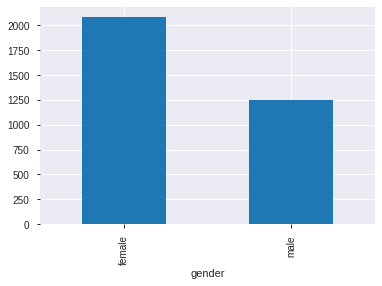

In [0]:

## Detemining who has a higher fear of pets between females and males  

sum_gender = data.groupby(['gender'])['pets'].sum()

sum_gender.plot.bar()

From the above we see that more females than males have a fear of pests

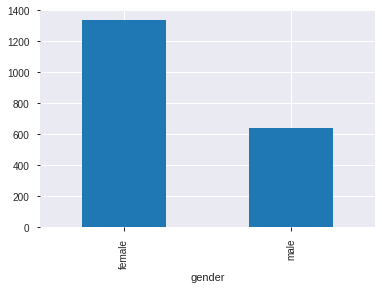

In [0]:

## Detemining who has a higher fear of storms between females and males  

sum_gender = data.groupby(['gender'])['storm'].sum()

sum_gender.plot.bar()

From the above we see that more females than males have a fear of storms

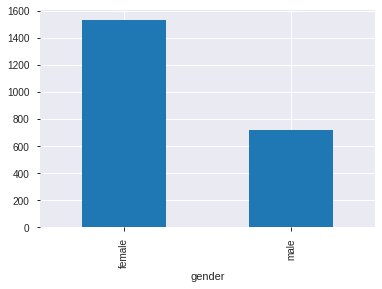

In [0]:

## Detemining who has a higher fear of darkness between females and males  

sum_gender = data.groupby(['gender'])['darkness'].sum()

sum_gender.plot.bar()



From the above we see that more females than males have a fear of darkness

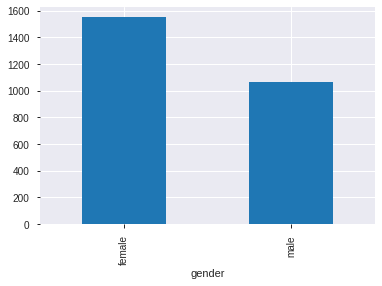

In [0]:

## Detemining who has a higher fear of heights between females and males  

sum_gender = data.groupby(['gender'])['heights'].sum()

sum_gender.plot.bar()

From the above we see that more females than males have a fear of heights

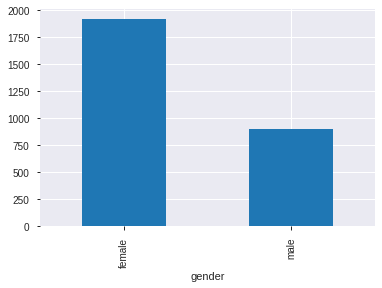

In [0]:

## Detemining who has a higher fear of spiders between females and males  

sum_gender = data.groupby(['gender'])['spiders'].sum()

sum_gender.plot.bar()

From the above we see that more females than males have a fear of spiders

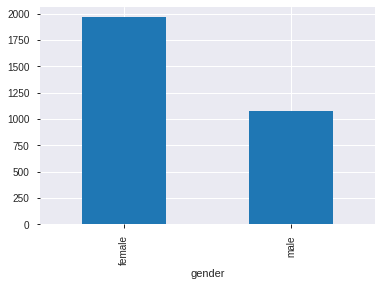

In [0]:

## Detemining who has a higher fear of snakes between females and males  

sum_gender = data.groupby(['gender'])['snakes'].sum()

sum_gender.plot.bar()

From the above we see that more females than males have a fear of snakes

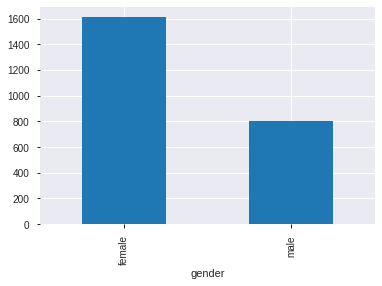

In [0]:

## Detemining who has a higher fear of rats between females and males  

sum_gender = data.groupby(['gender'])['rats'].sum()

sum_gender.plot.bar()

From the above we see that more females than males have a fear of rats

From the above we see that more females than males have a fear of heights

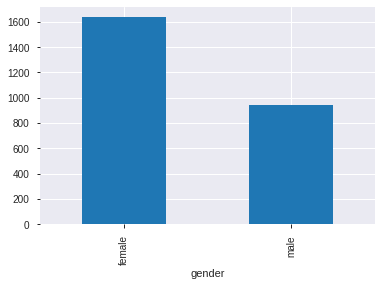

In [0]:

## Detemining who has a higher fear of ageing between females and males  

sum_gender = data.groupby(['gender'])['ageing'].sum()

sum_gender.plot.bar()

From the above we see that more females than males have a fear of ageing

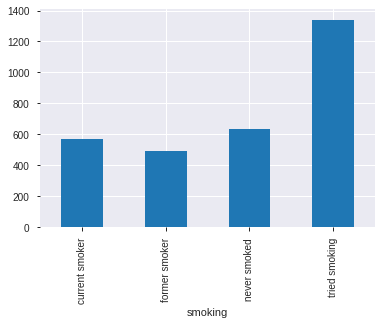

In [0]:

## Detemining the correlation between fear of snakes and people who smoke 

sum_gender = data.groupby(['smoking'])['snakes'].sum()

sum_gender.plot.bar()

From the above we see that most people who have tried smoking have a fear of snakes 

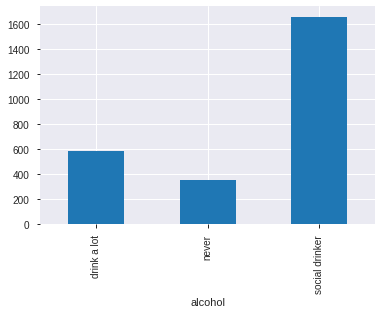

In [0]:

## Detemining the correlation between people who drink alcohol and have a fear of snakes  

sum_gender = data.groupby(['alcohol'])['ageing'].sum()

sum_gender.plot.bar()

From the above we see that most people who have a fear of ageing are social drinkers 

A summary of all phobias against male and female

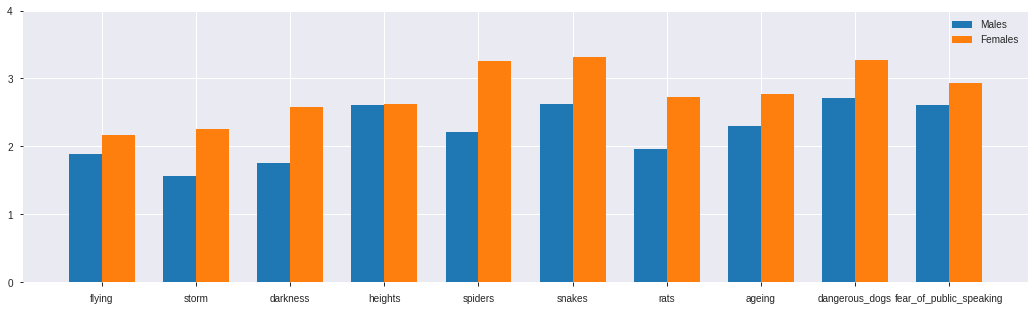

In [0]:
# Outline the various phobias
phobias = ['flying', 'storm', 'darkness', 'heights', 'spiders',
       'snakes', 'rats', 'ageing', 'dangerous_dogs', 'fear_of_public_speaking']
phobs = data.groupby('gender')[phobias].mean()
index = np.arange(len(phobias))
phobs_label = np.arange(0,5,1)
# Transpose the table
male_means = list(phobs.T['male'])
female_means = list(phobs.T['female'])
# Plot
bar_width = 0.35
fig, ax = plt.subplots(figsize=(18, 5))
barMale = ax.bar(index - bar_width/2, male_means, bar_width, label='Males')
barFemale = ax.bar(index + bar_width/2, female_means, bar_width, label='Females')
# Inserting x axis labels
ax.set_xticks(index)
ax.set_xticklabels(phobs)
# Inserting y axis labels
ax.set_yticks(phobs_label)
ax.set_yticklabels(phobs_label)
# Inserting legends
ax.legend()
plt.show()

# Test Analysis: Hypothesis Testing



*   Null Hypothesis: Gender and phobia are independent
*   Alternative Hypothesis: Gender and phobia are not independent




Level of significance: 0.05

In [0]:
 # we will use scipy.stats package to run the hypothesisi testing
 from scipy.stats import chi2
 

In [0]:
test = pd.DataFrame()
def table_creation(row, col):
  test = pd.crosstab(index=row, columns=col, margins=True)
  test.columns = ["1.0", "2.0", "3.0", "4.0", "5.0", "rowtotal"]
  return(test)

def chisq_test(t, i):
  # getting table without totals for later use
  observed = t.ix[0:2,0:5]
  # to get the expected count for a cell
  expected = np.outer(t["rowtotal"][0:2], t.ix["All"][0:5])/1010
  expected = pd.DataFrame(expected)
  expected.columns = ["1.0", "2.0", "3.0", "4.0", "5:0"]
  expected.index = test.index[0:2]

  #calculate the chi-sq statistics
  chi_squared_stat = (((observed-expected)**2)/expected ).sum().sum()
  print("Chi-sq stat")
  print(chi_squared_stat)
  crit =  chi2.ppf(q = 0.95, df = i) #find the critical value for 95% confidence
  print("Critical value")
  print(crit)
  p_value = 1 - chi2.cdf(x=chi_squared_stat, df = i) # find the p-value
  print("P value")
  print(p_value)
  return

In [0]:
test = table_creation(data["gender"], data["flying"])
print(test)
chisq_test(test, 4)

        1.0  2.0  3.0  4.0  5.0  rowtotal
gender                                   
female  241  132  133   50   36       592
male    221   73   74   20   20       408
All     462  205  207   70   56      1000
Chi-sq stat
18.55083801052747
Critical value
9.487729036781154
P value
0.000962800371105188


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is a

The p-value is less than the level of significance, hence we reject the null hypothesis.

In [0]:
test = table_creation(data["gender"], data["storm"])
print(test)
chisq_test(test, 4)

        1.0  2.0  3.0  4.0  5.0  rowtotal
gender                                   
female  201  181  109   58   43       592
male    270   78   41   15    6       410
All     471  259  150   73   49      1002
Chi-sq stat
89.69580963380133
Critical value
9.487729036781154
P value
0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is a

The p-value is less than the level of significance, hence we reject the null hypothesis.

In [0]:
test = table_creation(data["gender"], data["darkness"])
print(test)
chisq_test(test, 4)

        1.0  2.0  3.0  4.0  5.0  rowtotal
gender                                   
female  152  164  121   88   67       592
male    204  136   42   16   11       409
All     356  300  163  104   78      1001
Chi-sq stat
86.46166389235935
Critical value
9.487729036781154
P value
0.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is a

The p-value is less than the level of significance, hence we reject the null hypothesis.

In [0]:
test = table_creation(data["gender"], data["heights"])
print(test)
chisq_test(test, 4)

        1.0  2.0  3.0  4.0  5.0  rowtotal
gender                                   
female  156  136  143   91   66       592
male     94  118   87   74   35       408
All     250  254  230  165  101      1000
Chi-sq stat
6.539535531233443
Critical value
9.487729036781154
P value
0.16231630826283894


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is a

The p-value is more than the level of significance, hence we fail to reject the null hypothesis.

In [0]:
test = table_creation(data["gender"], data["spiders"])
print(test)
chisq_test(test, 4)

        1.0  2.0  3.0  4.0  5.0  rowtotal
gender                                   
female  113  106   91   78  202       590
male    170   96   65   41   36       408
All     283  202  156  119  238       998
Chi-sq stat
49.574545561298685
Critical value
9.487729036781154
P value
4.4302639334858895e-10


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is a

The p-value is less than the level of significance, hence we reject the null hypothesis.

In [0]:
test = table_creation(data["gender"], data["snakes"])
print(test)
chisq_test(test, 4)

        1.0  2.0  3.0  4.0  5.0  rowtotal
gender                                   
female  107   85  101  114  186       593
male    129   74   90   58   59       410
All     236  159  191  172  245      1003
Chi-sq stat
27.615784678229737
Critical value
9.487729036781154
P value
1.4921132901690726e-05


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is a

The p-value is less than the level of significance, hence we reject the null hypothesis.

In [0]:
test = table_creation(data["gender"], data["rats"])
print(test)
chisq_test(test, 4)

        1.0  2.0  3.0  4.0  5.0  rowtotal
gender                                   
female  182   95  123   90  102       592
male    199   92   64   38   15       408
All     381  187  187  128  117      1000
Chi-sq stat
36.4101008157364
Critical value
9.487729036781154
P value
2.3826624273581842e-07


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is a

The p-value is less than the level of significance, hence we reject the null hypothesis.

In [0]:
test = table_creation(data["gender"], data["ageing"])
print(test)
chisq_test(test, 4)

        1.0  2.0  3.0  4.0  5.0  rowtotal
gender                                   
female  153  107  153   84   95       592
male    160   83   86   43   38       410
All     313  190  239  127  133      1002
Chi-sq stat
19.305053876394076
Critical value
9.487729036781154
P value
0.0006845630523645285


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is a

The p-value is less than the level of significance, hence we reject the null hypothesis.

In [0]:
test = table_creation(data["gender"], data["dangerous_dogs"])
print(test)
chisq_test(test, 4)

        1.0  2.0  3.0  4.0  5.0  rowtotal
gender                                   
female   87   96  133  122  154       592
male     90   93  117   67   43       410
All     177  189  250  189  197      1002
Chi-sq stat
18.702961819849428
Critical value
9.487729036781154
P value
0.0008988887161976988


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is a

The p-value is less than the level of significance, hence we reject the null hypothesis.

In [0]:
test = table_creation(data["gender"], data["fear_of_public_speaking"])
print(test)
chisq_test(test, 4)

        1.0  2.0  3.0  4.0  5.0  rowtotal
gender                                   
female   86  134  180  119   74       593
male     89   98  128   72   22       409
All     175  232  308  191   96      1002
Chi-sq stat
8.459397902657408
Critical value
9.487729036781154
P value
0.07612753623462543


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is a

The p-value is more than the level of significance, hence we fail to reject the null hypothesis.

In [0]:
test = table_creation(data["gender"], data["dangerous_dogs"])
print(test)
chisq_test(test, 4)

        1.0  2.0  3.0  4.0  5.0  rowtotal
gender                                   
female   87   96  133  122  154       592
male     90   93  117   67   43       410
All     177  189  250  189  197      1002
Chi-sq stat
18.702961819849428
Critical value
9.487729036781154
P value
0.0008988887161976988


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is a

The p-value is less than the level of significance, hence we reject the null hypothesis.

In [0]:
test = table_creation(data["gender"], data["pets"])
print(test)
chisq_test(test, 4)

        1.0  2.0  3.0  4.0  5.0  rowtotal
gender                                   
female  110   66   74   85  256       591
male     95   50   92   77   94       408
All     205  116  166  162  350       999
Chi-sq stat
20.723451347190267
Critical value
9.487729036781154
P value
0.0003592559884072477


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:822: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  retval = getattr(retval, self.name)._getitem_axis(key, axis=i)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  # This is a

The p-value is less than the level of significance, hence we reject the null hypothesis.

## **Conclusion**

In every test except gender verses fear of public speaking and  gender verses heights, the p-value is less than the level of significance, hence we reject the null hypothesis in favour of the alternative, that is, gender and phobia are not independent.

# Recommendation

A predictive analysis to be done on the different clusters of behaviors, to predict the various kinds of phobias amongst the young people.